# Podstawy Przetwarzania Dużych Zbiorów Danych

Grupa IBD4 Poniedziałki 8:30

Łukasz Moskwa 247739

Artur Szewczykowski 252546


# 0.0 Importy

In [406]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
import plotly.subplots as sp

sns.set_theme(style="ticks")

def plot_rolling_stats_subplots(df, metric_name, window=14, figsize=(14, 12)):
    """
    Generuje podwójny wykres w subplotach z separacją:
    - górny: tylko średnia krocząca
    - dolny: średnia + odchylenie + wypełniony obszar
    
    Parametry:
    ----------
    df : DataFrame
        Zbiór danych
    metric_name : str
        Nazwa metryki (np. 'Nowe_zachorowania')
    window : int
        Okno dla średniej kroczącej
    figsize : tuple
        Rozmiar wykresu
    """
    # Utworzenie figury z GridSpec
    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(3, 1, height_ratios=[1, 0.05, 1])  # 3 wiersze: wykres, linia, wykres
    
    # Górny wykres - średnia krocząca
    ax1 = fig.add_subplot(gs[0])
    sns.lineplot(data=df, x='date', y=f'{metric_name}_srednia_{window}dni',
                label=f'Średnia {window}-dniowa', color='darkblue', linewidth=2, ax=ax1, errorbar=None)
    ax1.set(title=f'{metric_name.replace("_", " ")} - średnia {window}-dniowa', 
           ylabel='Liczba',
           xlabel='')
    ax1.legend()
    ax1.grid(True)
    
    # Czarna linia oddzielająca
    ax_line = fig.add_subplot(gs[1])
    ax_line.axis('off')
    ax_line.axhline(y=0.5, color='black', linewidth=2)
    
    # Dolny wykres - analiza zmienności
    ax2 = fig.add_subplot(gs[2])
    sns.lineplot(data=df, x='date', y=f'{metric_name}_srednia_{window}dni',
                label=f'Średnia {window}-dniowa', color='darkblue', linewidth=2, ax=ax2, errorbar=None)
    sns.lineplot(data=df, x='date', y=f'{metric_name}_odchylenie_{window}dni',
                label=f'Odchylenie {window}-dniowe', color='red', linewidth=1.5, alpha=0.5, ax=ax2, errorbar=None)
    ax2.fill_between(df['date'],
                    df[f'{metric_name}_srednia_{window}dni'] - df[f'{metric_name}_odchylenie_{window}dni'],
                    df[f'{metric_name}_srednia_{window}dni'] + df[f'{metric_name}_odchylenie_{window}dni'],
                    color='skyblue', alpha=0.3, label=f'Zakres ±1σ ({window} dni)')
    ax2.set(title=f'{metric_name.replace("_", " ")} - analiza zmienności', 
           xlabel='Data', 
           ylabel='Liczba')
    ax2.legend()
    ax2.grid(True)
    
    # Wspólne formatowanie
    for ax in [ax1, ax2]:
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'.replace(',', ' ')))
        ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

df_data = pd.read_csv("../Poziom_1/wyniki/final_data.csv")
df_data['date'] = pd.to_datetime(df_data['date'])
df_data = df_data.sort_values('date')
df_europe = df_data[df_data['Continent'] == 'Europe'].copy()
df_europe

Country_name 3_letter_code  population_urban  gdp_per_capita_usd  \
250            Latvia           LVA         1304943.0             17818.0   
12709          Norway           NOR         4418218.0             75419.0   
12710          Norway           NOR         4418218.0             75419.0   
251            Latvia           LVA         1304943.0             17818.0   
12711          Norway           NOR         4418218.0             75419.0   
...               ...           ...               ...                 ...   
18512  Czech Republic           CZE         7887156.0             23010.0   
9852          Austria           AUT         5194416.0             51448.0   
28383           Italy           ITA        42651966.0             34456.0   
28384           Italy           ITA        42651966.0             34456.0   
18513  Czech Republic           CZE         7887156.0             23010.0   

           GDP_2022       date  Total_confirmed_cases  Total_new_deceased  \
250    3.420999e+10 2020-12-07                    712                   5   
12709  4.018484e+11 2020-12-08                    392                   2   
12710  4.018484e+11 2020-12-09                    453                   0   
251    3.420999e+10 2020-12-09                    680                  15   
12711  4.018484e+11 2020-12-10                    435                  21   
...             ...        ...                    ...                 ...   
18512  2.450519e+11 2022-09-13                   3020                   5   
9852   4.557663e+11 2022-09-13                   6177                   1   
28383  2.079749e+12 2022-09-13                  23161                  93   
28384  2.079749e+12 2022-09-14                  18854                  69   
18513  2.450519e+11 2022-09-14                   2625                   2   

       Total_new_vaccinations  New_persons_fully_vaccinated  ...  \
250                       1.0                           NaN  ...   
12709                     5.0                           NaN  ...   
12710                     1.0                           NaN  ...   
251                       1.0                           NaN  ...   
12711                     1.0                           NaN  ...   
...                       ...                           ...  ...   
18512                    84.0                          82.0  ...   
9852                     98.0                           0.0  ...   
28383                   306.0                         216.0  ...   
28384                   239.0                         222.0  ...   
18513                    64.0                          83.0  ...   

       Murders_Rate_2012  Murders_Rate_2013  Murders_Rate_2014  \
250             3.408588           2.461252           3.182435   
12709           0.537950           0.905393           0.564430   
12710           0.537950           0.905393           0.564430   
251             3.408588           2.461252           3.182435   
12711           0.537950           0.905393           0.564430   
...                  ...                ...                ...   
18512           0.998947           0.855957           0.770168   
9852            0.960896           0.719379           0.491454   
28383           0.880543           0.832330           0.787430   
28384           0.880543           0.832330           0.787430   
18513           0.998947           0.855957           0.770168   

       Murders_Rate_2015  Murders_Rate_2016  Murders_Rate_2017  \
250             3.363531           3.496369           4.143514   
12709           0.462396           0.515603           0.530565   
12710           0.462396           0.515603           0.530565   
251             3.363531           3.496369           4.143514   
12711           0.462396           0.515603           0.530565   
...                  ...                ...                ...   
18512           0.836200           0.617425           0.626703   
9852            0.509

# Część 1: Analiza danych

In [386]:
columns: dict = {
    'Nowe_zachorowania': 'Total_confirmed_cases',
    'Nowe_zgony': 'Total_new_deceased',
    'Nowe_szczepienia': 'Total_new_vaccinations',
    'Nowe_pełne_szczepienia': 'New_persons_fully_vaccinated',
    'Nowe_testy': 'Total_tested'
}

df_europe_ex1 = df_europe[['date'] + list(columns.values())].copy()

for key, value in columns.items():
    df_europe_ex1[f'{key}_srednia_14dni'] = df_europe_ex1[value].rolling(window=14).mean()
    df_europe_ex1[f'{key}_odchylenie_14dni'] = df_europe_ex1[value].rolling(window=14).std()

df_europe_ex1

date  Total_confirmed_cases  Total_new_deceased  \
250   2020-12-07                    712                   5   
12709 2020-12-08                    392                   2   
12710 2020-12-09                    453                   0   
251   2020-12-09                    680                  15   
12711 2020-12-10                    435                  21   
...          ...                    ...                 ...   
18512 2022-09-13                   3020                   5   
9852  2022-09-13                   6177                   1   
28383 2022-09-13                  23161                  93   
28384 2022-09-14                  18854                  69   
18513 2022-09-14                   2625                   2   

       Total_new_vaccinations  New_persons_fully_vaccinated  Total_tested  \
250                       1.0                           NaN          9764   
12709                     5.0                           NaN         18928   
12710                     1.0                           NaN         19328   
251                       1.0                           NaN          9642   
12711                     1.0                           NaN         17819   
...                       ...                           ...           ...   
18512                    84.0                          82.0          6575   
9852                     98.0                           0.0        105278   
28383                   306.0                         216.0        184211   
28384                   239.0                         222.0        171457   
18513                    64.0                          83.0          6240   

       Nowe_zachorowania_srednia_14dni  Nowe_zachorowania_odchylenie_14dni  \
250                                NaN                                 NaN   
12709                              NaN                                 NaN   
12710                              NaN                                 NaN   
251                                NaN                                 NaN   
12711                              NaN                                 NaN   
...                                ...                                 ...   
18512                      3589.000000                         3621.189201   
9852                       3150.428571                         2749.770304   
28383                      4746.642857                         5932.891027   
28384                      5531.214286                         7006.776831   
18513                      5520.357143                         7011.489007   

       Nowe_zgony_srednia_14dni  Nowe_zgony_odchylenie_14dni  \
250                         NaN                          NaN   
12709                       NaN                          NaN   
12710                       NaN                          NaN   
251                         NaN                          NaN   
12711                       NaN                          NaN   
...                         ...                          ...   
18512                  8.714286                    12.754659   
9852                   6.357143                    10.587417   
28383                 12.928571                    25.314831   
28384                 17.857143                    29.046004   
18513                 17.785714                    29.086551   

       Nowe_szczepienia_srednia_14dni  Nowe_szczepienia_odchylenie_14dni  \
250                               NaN                                NaN   
12709                             NaN                                NaN   
12710                             NaN                                NaN   
251                               NaN                                NaN   
12711                             NaN                                NaN   
...                               ...                                ...   
18512                       83.571429                         104.978910   
9852            

## 1.1 Liczby nowych zachorowań

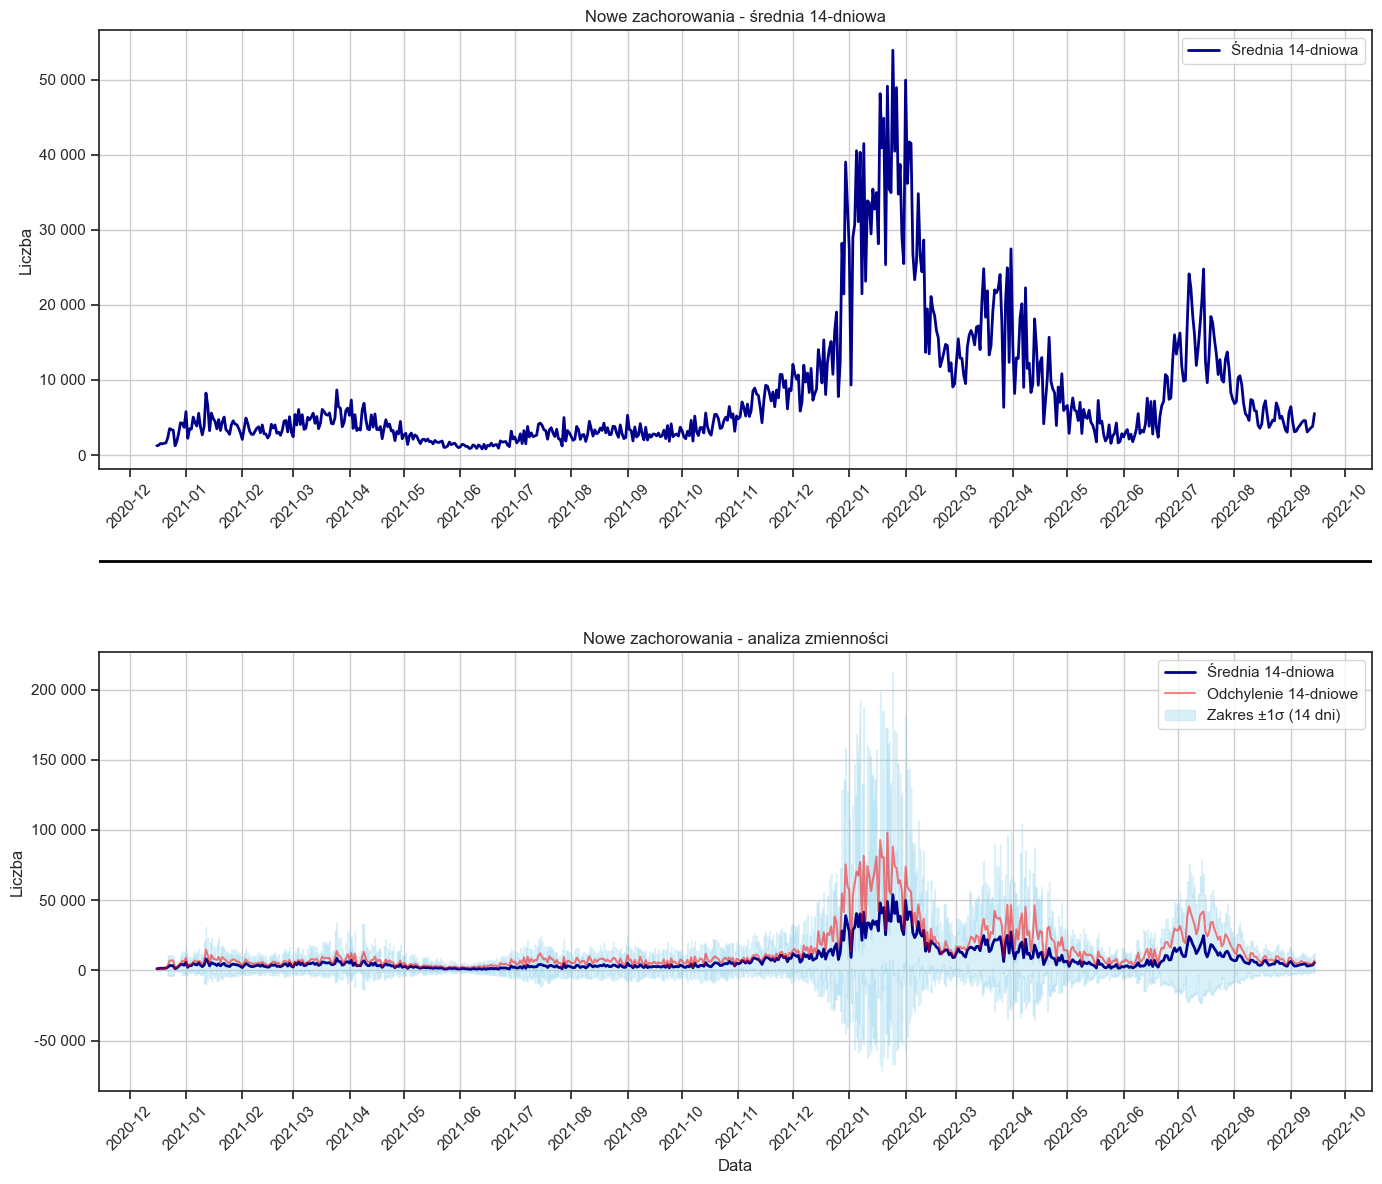

In [387]:
plot_rolling_stats_subplots(df_europe_ex1, 'Nowe_zachorowania')

Wnioski:
1. Widzimy bardzo dużo nowych zachorowań po 2 latach od pojawieenia się wirusa. 
2. Obserwujemy, że w okresach około świątecznych oraz wakacyjnych wzrasta liczba zachorowań.
3. Zauważamy również fakt, w czasie liczniejszych wysypów zachorowań bardzo mocno rośnie wartość odchylenia standardowego.

# 1.2 Liczba nowych śmierci

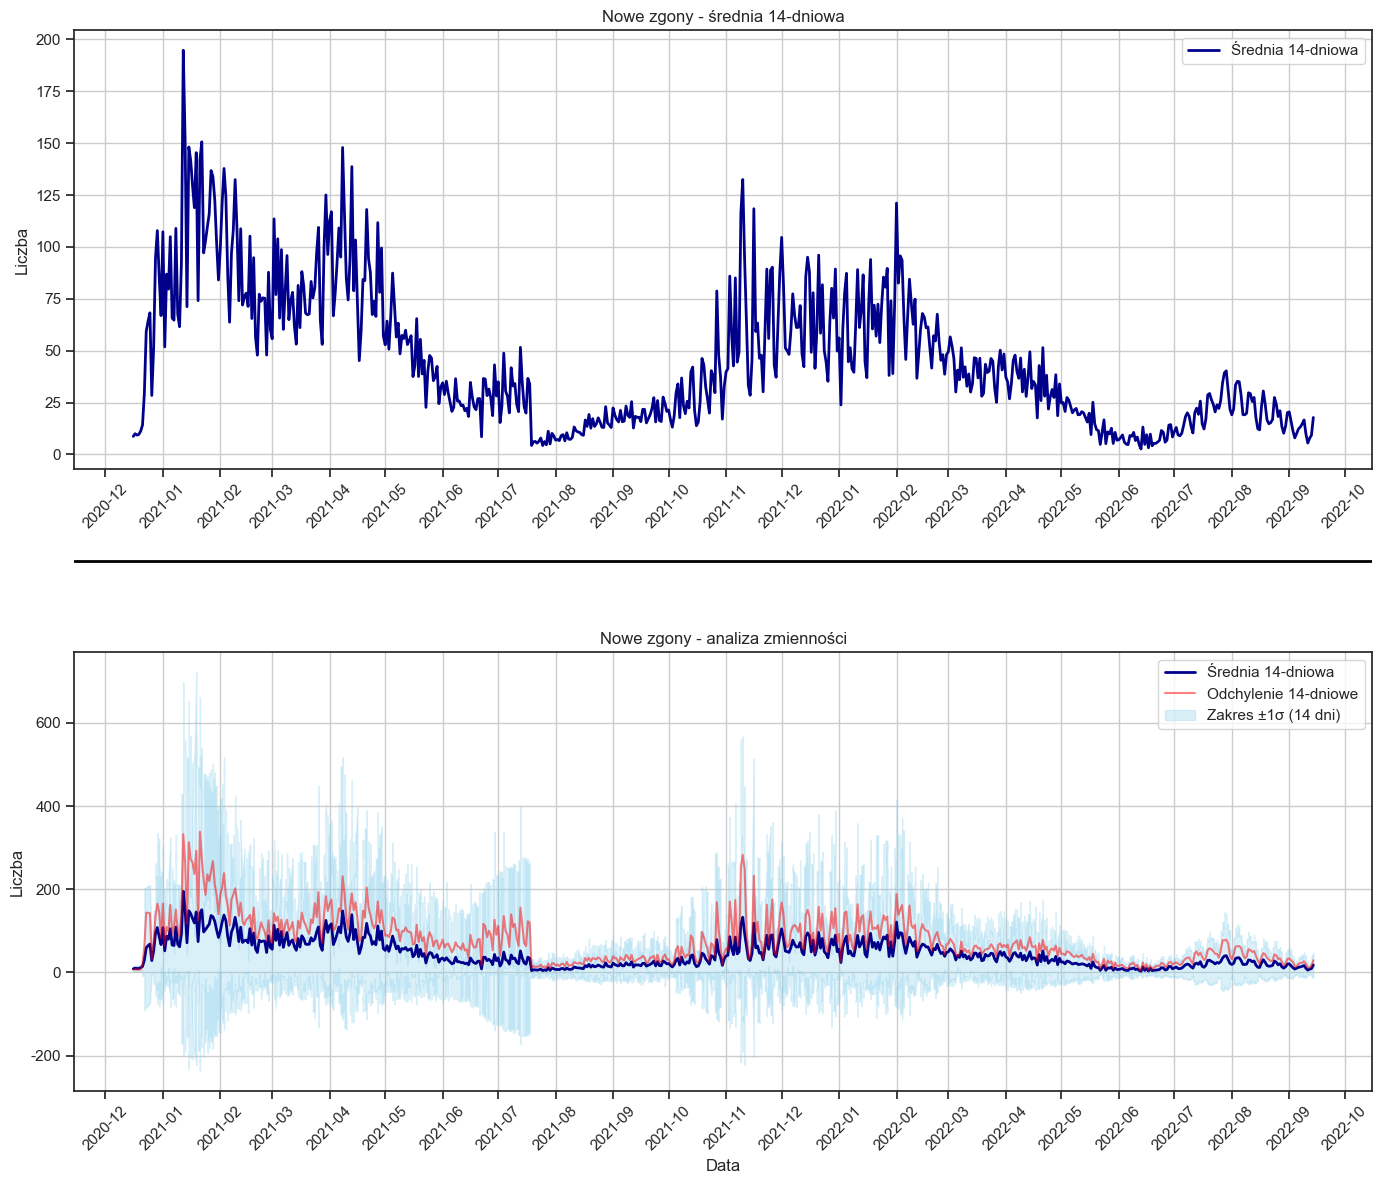

In [388]:
plot_rolling_stats_subplots(df_europe_ex1, 'Nowe_zgony')

Wnioski:
1. Na początku 2021 roku wprowadzano lockdown w większości państw europejskich oraz zaczęto szczepienia. Co przyczyniło się do prawie zerowych zgonów w Europie.
2. Po zmniejszeniu ograniczeń ponownie widać rosnącą liczbę zgonów.
3. Po 2021 roku liczba zgonów zaczeła poważnie maleć co może pokazywać, że ludzie nabierali odporności zbiorowej.

# 1.3 Liczba nowych szczepień

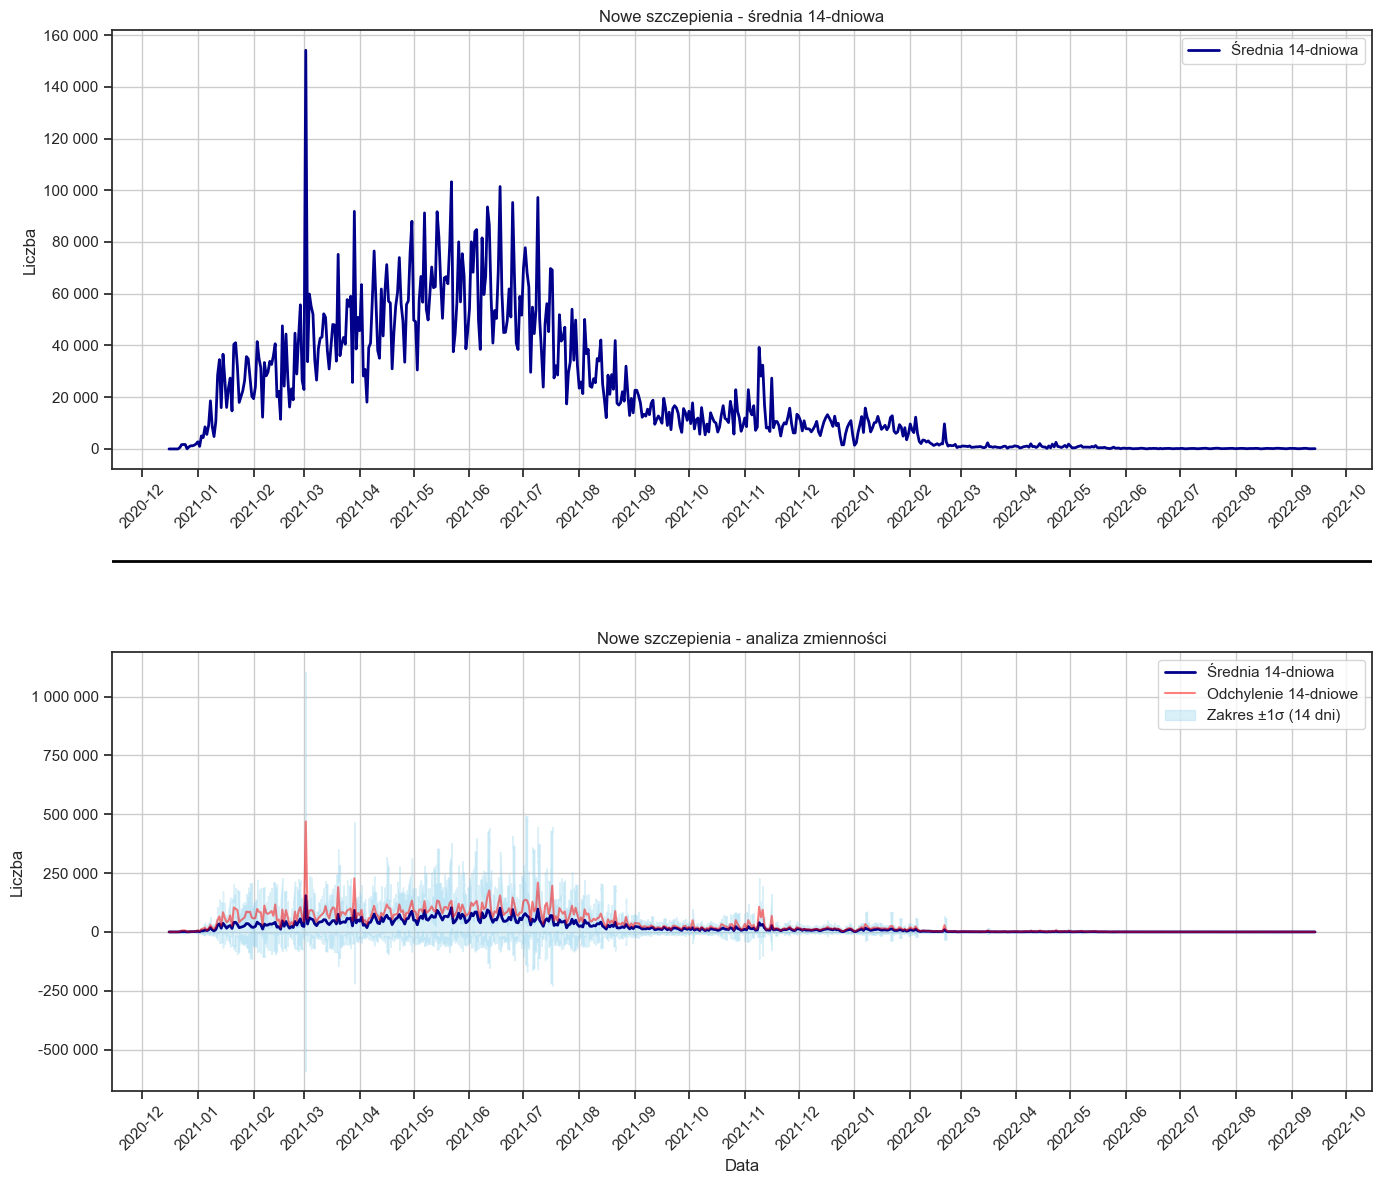

In [389]:
plot_rolling_stats_subplots(df_europe_ex1, 'Nowe_szczepienia')

Wnioski:
1. Duża liczba szczepień zaraz po ich wprowadzeniu. Nastepnie stopniowo mniejsze zainteresowanie szczepieniami.

# 1.4 Liczba w pełni zaszczepionych

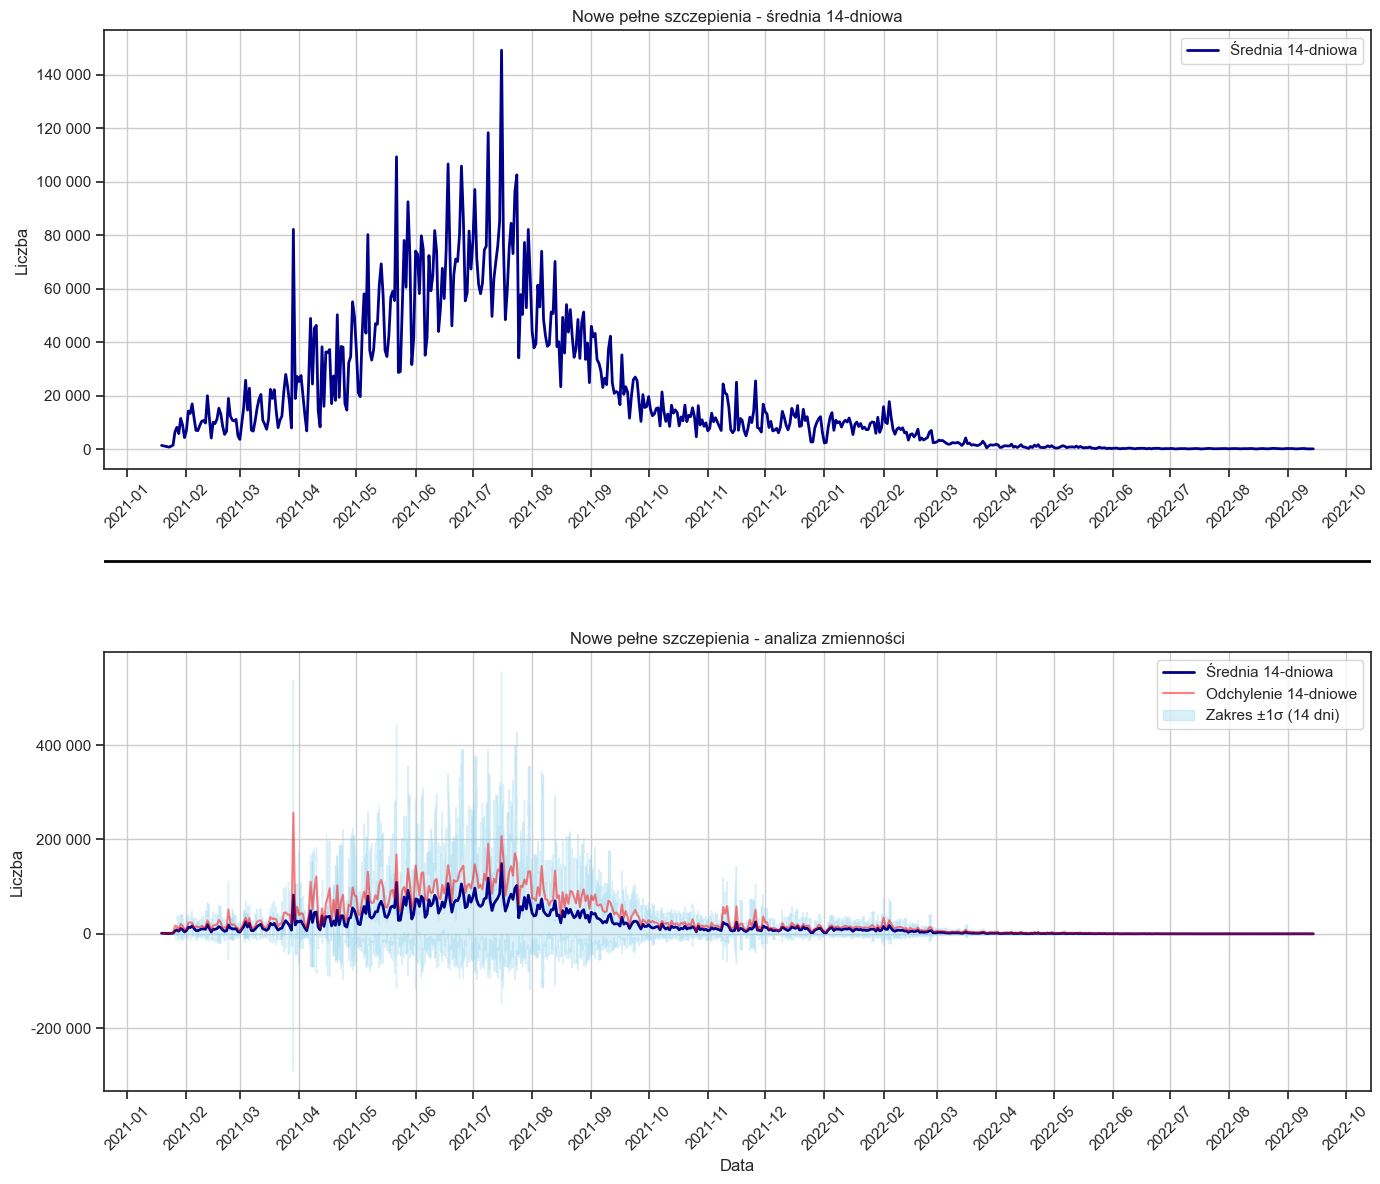

In [390]:
plot_rolling_stats_subplots(df_europe_ex1, 'Nowe_pełne_szczepienia')

Wnioski:
1. Duża liczba szczepień zaraz po ich wprowadzeniu. Nastepnie stopniowo mniejsze zainteresowanie szczepieniami.
2. Bardzo ładnie widać przesunięcie trendu w czasie względem zwykłych szczepień.

# 1.5 Liczba testów

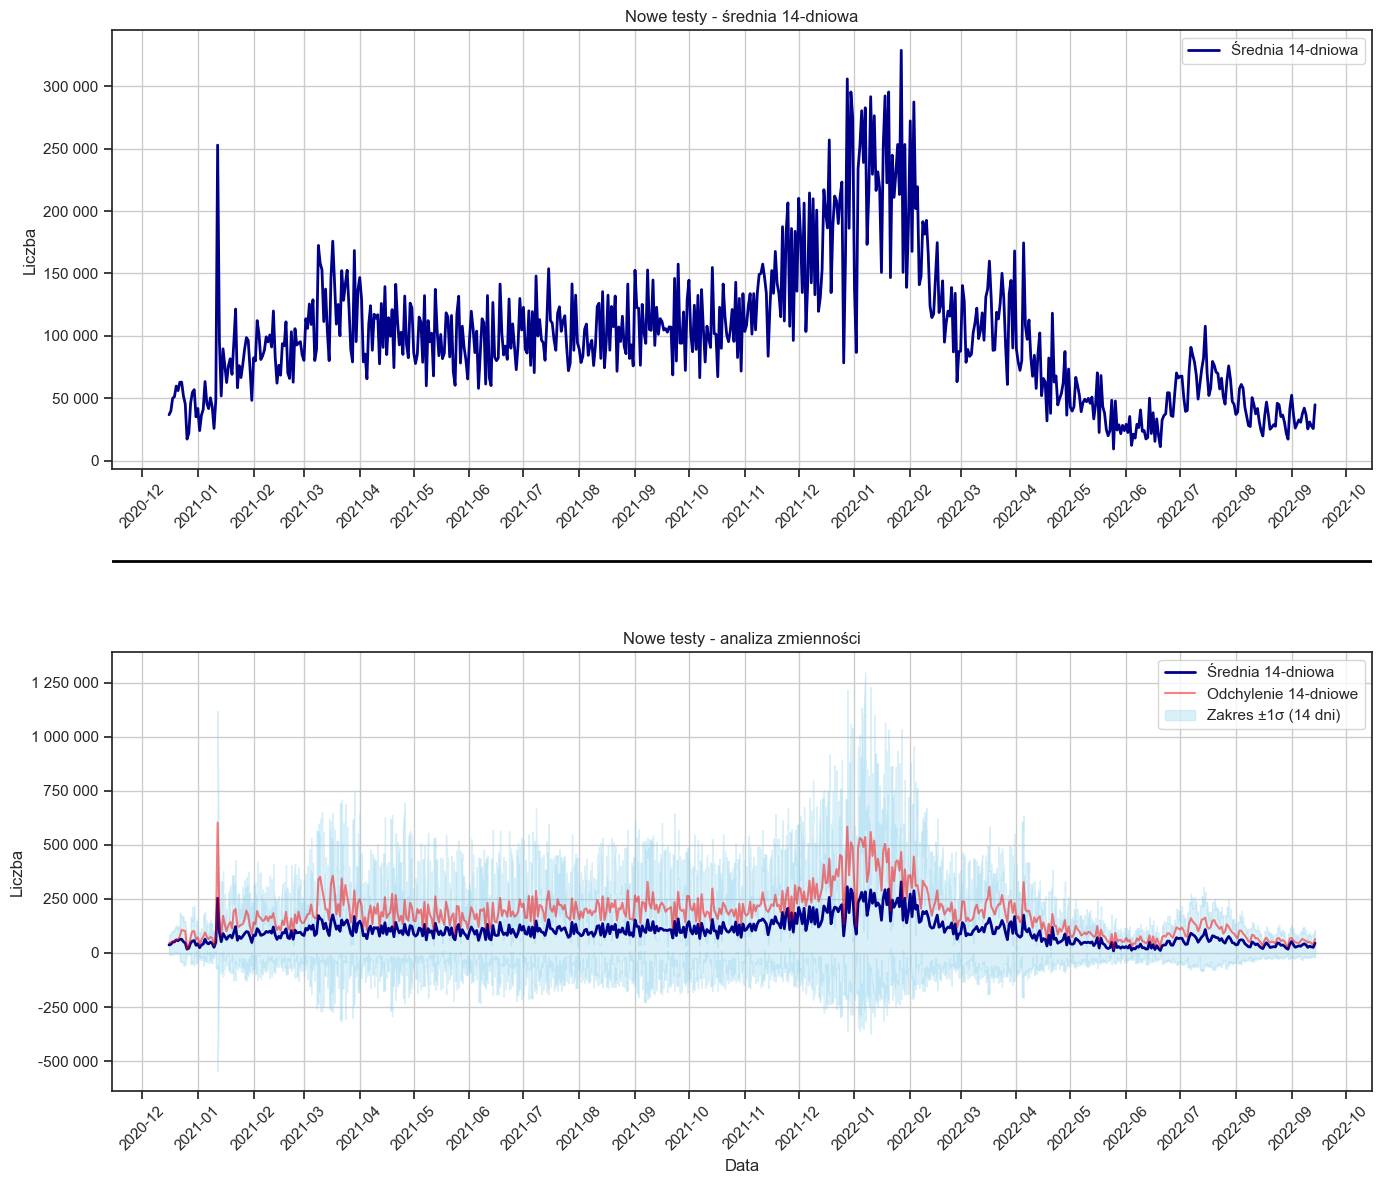

In [391]:
plot_rolling_stats_subplots(df_europe_ex1, 'Nowe_testy')

Wnioski:
1. Wyglądaja jak nałożenie na siebie wykresów zachorowań i śmierci.
2. Testy przez prawie cały okres trwania COVID19 utrzymywały się na podobnym poziomie.
3. Zauważamy, że w okresie świąt Bożego Narodzenia 2021 oraz zimy 2021-2022 wykonywano więcej testów niż zwykle

# Część 2 - Szeregi czasowe

Do analizy szeregów czasowych możemy stosować: średnie ruchome, dekompozycje oraz ARIMA (Autoregressive Integrated Moving Average), SARIMA (ARIMA ale z sezonowością).

<Axes: xlabel='date'>

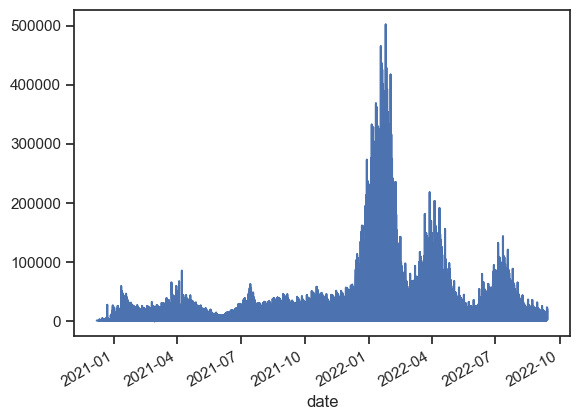

In [ ]:
import statsmodels.api as sm

df_europe_ex2 = df_europe[['date'] + list(columns.values())].copy()

df_europe_ex2.set_index('date', inplace=True)

In [ ]:
# Usunięcie brakujących wartości
y = df_europe_ex2['Total_confirmed_cases'].dropna()

# Dekompozycja szeregów czasowych
decomposition = sm.tsa.seasonal_decompose(y, model="additive", period=7)

# Tworzymy układ wykresów 5 wykresów (4 dane dekompozycji i 1 z datą do wyboru zakresu)
fig = sp.make_subplots(
    rows=5, cols=1,
    subplot_titles=["Original Data", "Trend", "Seasonality", "Residuals", "Date Selection"],
    shared_xaxes=True,  # Wspólny zakres osi X
    vertical_spacing=0.1
)

# Dodanie wykresu dla każdego komponentu dekompozycji
fig.add_trace(go.Scatter(x=df_europe_ex2.index, y=decomposition.observed, mode='lines', name='Original Data'), row=1, col=1)
fig.add_trace(go.Scatter(x=df_europe_ex2.index, y=decomposition.trend, mode='lines', name='Trend'), row=2, col=1)
fig.add_trace(go.Scatter(x=df_europe_ex2.index, y=decomposition.seasonal, mode='lines', name='Seasonality'), row=3, col=1)
fig.add_trace(go.Scatter(x=df_europe_ex2.index, y=decomposition.resid, mode='lines', name='Residuals'), row=4, col=1)

# Dodanie wykresu tylko z datą (aby umożliwić wybór zakresu)
fig.add_trace(go.Scatter(x=df_europe_ex2.index, y=df_europe_ex2.index, mode='lines', name='Date Selection', line=dict(color='rgba(255,255,255,0)')), row=5, col=1)

# Ustawienia stylu (similar to sns.whitegrid)
fig.update_layout(
    template="plotly_white",  # Styl przypominający Seaborn
    title="Decomposition of Total Confirmed Cases COVID-19 (Europe)",
    xaxis_title="Date",
    yaxis_title="Values",
    xaxis_rangeslider_visible=True,  # Dodanie suwaka dla zakresu osi X
    hovermode='closest',  # Tryb podpowiedzi
    showlegend=False,  # Ukrycie legendy (można włączyć, jeśli chcesz)
    height=900,  # Wysokość wykresów (większa, bo dodajemy 5 wykresów)
)

# Dodanie formatowania dla osi X (wspólny zakres)
fig.update_xaxes(
    tickformat="%Y-%m",  # Format daty: Rok-Miesiąc
    showgrid=True,
)

# Pokaż wykresyimport plotly.graph_objects as go
import plotly.subplots as sp
import statsmodels.api as sm

# Usunięcie brakujących wartości
y = df_europe_ex2['Total_confirmed_cases'].dropna()

# Dekompozycja szeregów czasowych
decomposition = sm.tsa.seasonal_decompose(y, model="additive", period=7)

# Tworzymy układ wykresów 4 wykresów (4 dane dekompozycji)
fig = sp.make_subplots(
    rows=4, cols=1,
    subplot_titles=["Original Data", "Original Data", "Seasonality", "Residuals"],
    shared_xaxes=True,  # Wspólny zakres osi X
    vertical_spacing=0.1
)

# Dodanie wykresu dla każdego komponentu dekompozycji
fig.add_trace(go.Scatter(x=df_europe_ex2.index, y=decomposition.observed, mode='lines', name='Original Data'), row=1, col=1)
fig.add_trace(go.Scatter(x=df_europe_ex2.index, y=decomposition.observed, mode='lines', name='Original Data'), row=2, col=1)  # Zmiana: Trend zmienia się na Original Data
fig.add_trace(go.Scatter(x=df_europe_ex2.index, y=decomposition.seasonal, mode='lines', name='Seasonality'), row=3, col=1)
fig.add_trace(go.Scatter(x=df_europe_ex2.index, y=decomposition.resid, mode='lines', name='Residuals'), row=4, col=1)

# Ustawienia stylu (similar to sns.whitegrid)
fig.update_layout(
    template="plotly_white",  # Styl przypominający Seaborn
    title="Decomposition of Total Confirmed Cases COVID-19 (Europe)",
    xaxis_title="Date",
    yaxis_title="Values",
    xaxis_rangeslider_visible=True,  # Dodanie suwaka dla zakresu osi X
    hovermode='closest',  # Tryb podpowiedzi
    showlegend=False,  # Ukrycie legendy (można włączyć, jeśli chcesz)
    height=800,  # Wysokość wykresów
)

# Dodanie formatowania dla osi X (wspólny zakres)
fig.update_xaxes(
    tickformat="%Y-%m",  # Format daty: Rok-Miesiąc
    showgrid=True,
)

# Pokaż wykresy
fig.show()

fig.show()